In [1]:
!python.exe -m pip install --upgrade pip

In [ ]:
!pip install pytesseract
!pip install beautifulsoup4
!pip install pandas
!pip install tensorflow
!pip install Pillow
!pip install lxml
!pip install html5lib

In [4]:
from bs4 import BeautifulSoup
import base64
import pandas as pd
import tensorflow as tf
from pytesseract import pytesseract
from PIL import Image
import glob

In [ ]:
# %cd C:\Users\user\Desktop\Working\向高手求救--落點分析交叉查榜依考區查榜

# *交叉查榜*.html

C:\Users\User\Desktop\backup\brt\Projects\crawing\data
i: 

i: <td align="right" scope="row" valign="middle"></td>
i: 

i: <td align="right" scope="row" valign="middle" width="8%"><div align="center" class="leftred"></div></td>

i: 

i: <td align="center" scope="row" valign="middle" width="28%"><div align="center">
<a href="https://www.com.tw/cross/checktestareaid_48_k5ZqbpRq_112.html" title="點擊看看==&gt;這試場同學,他們推上哪些校系">
<br/>考區 : 國立中興大學附中 </a>
</div></td>
L11*xx*0

i: 

i: <td align="center" width="8%">*&lt;img height="18" ,="" src=""&gt; </td>
i: 

i: <td colspan="4"><div align="left">
<div align="left">
<table border="0" cellpadding="0" cellspacing="0" width="100%">
<tbody><tr align="left">
<td scope="row" width="7%"><div align="right">
</div></td>
<td scope="row" width="75%"><div align="left"><a href="https://www.com.tw/cross/check_030172_NO_1_112_0_3.html">長庚大學 人工智慧學系</a></div></td>
<td width="20%"><div align="left">
<div align="left" class="leftred" style="padding-left:10px"></div>
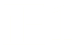
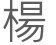
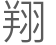
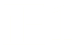
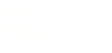
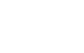
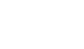
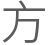
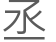
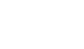
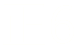
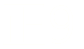
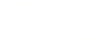
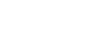
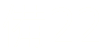
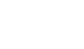
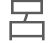
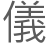
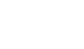
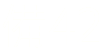
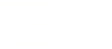
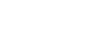
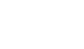
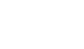
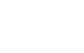
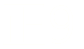
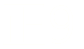
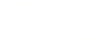
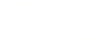
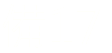
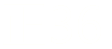
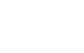
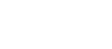
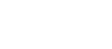
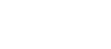
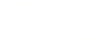
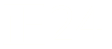
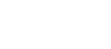
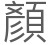
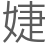
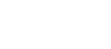
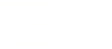
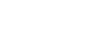
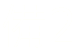
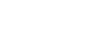
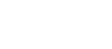
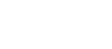
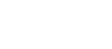
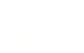
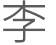
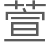
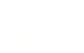
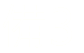
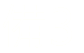
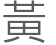
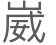
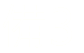
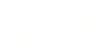
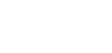
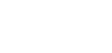
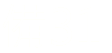
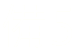
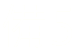
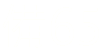
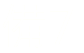
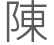
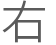
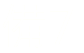
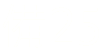
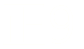
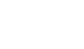
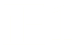
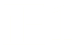
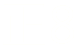
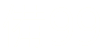
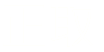
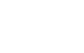
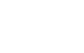
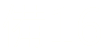
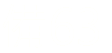
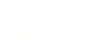
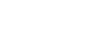
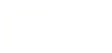
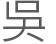
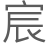
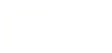
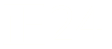
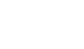
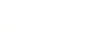
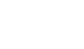
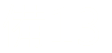
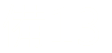
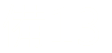
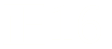
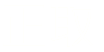
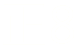
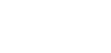
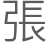
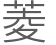
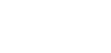
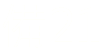
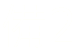
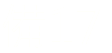
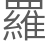
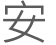
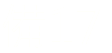
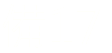
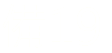
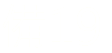
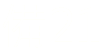
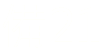
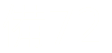
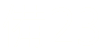
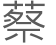
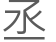
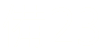
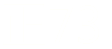
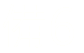
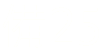
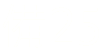
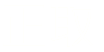
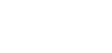
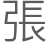
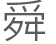
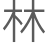
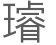
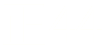
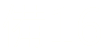
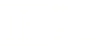
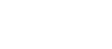
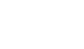
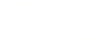
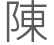
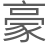
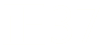
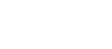
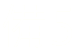
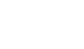
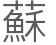
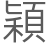
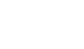
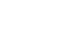
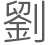
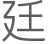
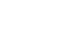
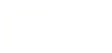
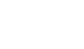
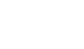
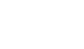
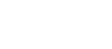
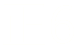
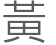
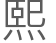
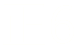
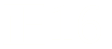
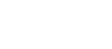
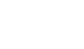
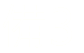
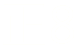
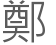
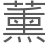
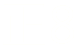
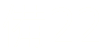
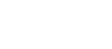
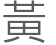
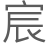
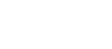
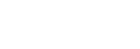
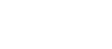
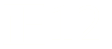
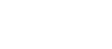
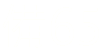
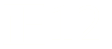
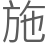
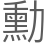
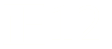
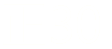
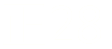
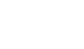
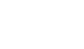
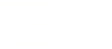
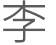
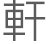
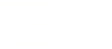
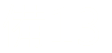
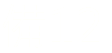
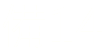
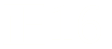
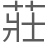
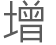
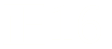
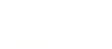
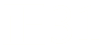
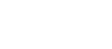
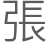
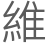
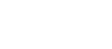
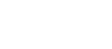
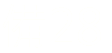
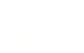
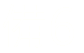
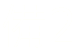
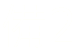
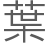
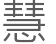
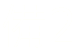
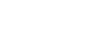
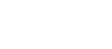
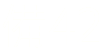
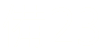
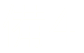
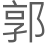
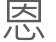
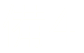
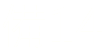
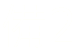
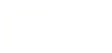
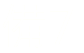
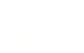
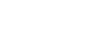
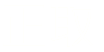
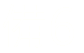
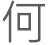
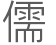
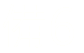
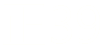
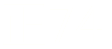
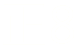
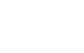
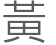
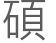
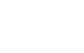
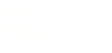
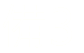
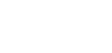
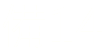
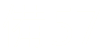
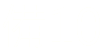
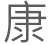
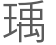
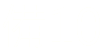
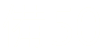
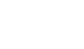
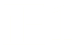
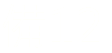
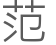
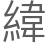
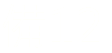
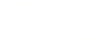
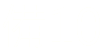
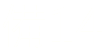
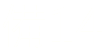
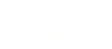
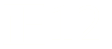
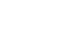
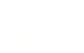
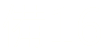
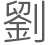
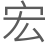
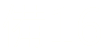
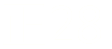
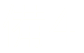
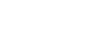
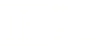
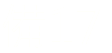
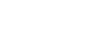
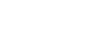
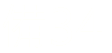
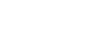
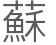
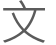
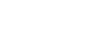
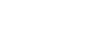
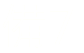
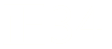
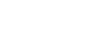
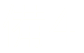
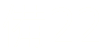
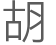
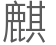
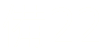
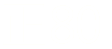
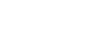
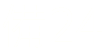
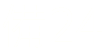
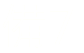
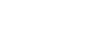
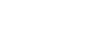
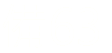
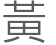
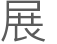
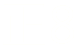
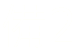
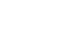
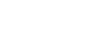
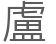
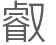
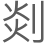
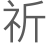
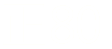
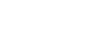
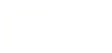
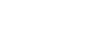
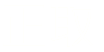

In [59]:
%cd C:\Users\User\Desktop\backup\brt\Projects\crawing\data

for file in glob.iglob('*交叉查榜*.html'):
    # print(file)
    processing_department(file)

In [58]:
def processing_department(filename):
    
    with open(filename, 'r', encoding="utf-8") as file:
        html = file.read()
        # print(html)
        soup = BeautifulSoup(html, 'html.parser')
    
    fields = ['rank', 'exam_location', 'stuno', 'univ',  'year']
    df = pd.DataFrame(columns=fields)
    df1 = pd.DataFrame(columns=fields)
    df2 = pd.DataFrame(columns=fields)

    str = soup.head.find_all('title')[0].text
    pos = str.find('年')
    year = str[pos-3:pos]  # str[5:8] str[5], str[6], str[7]

    str = soup.head.find_all('title')[0].text
    pos = str.find('-')
    univ = str[:pos].rstrip()

    dark_list = soup.body.find_all(bgcolor="#DEDEDC") # 褐色
    df1 = processing_list(univ, year, dark_list, df)
    # print(df1)
    
    white_list = soup.body.find_all(bgcolor="#FFFFFF") # 白色
    df2 = processing_list(univ, year, white_list, df)
    # print(df2)
    
    # craw more data
    
    # make two df cross-interleave
    max_len = max(len(df1), len(df2))
    for i in range(max_len):
        if i < len(df1):
            df = pd.concat([df, df1.iloc[[i]]], ignore_index=True)
        if i < len(df2):
            df = pd.concat([df, df2.iloc[[i]]], ignore_index=True)


    folder = r"C:\Users\User\Desktop\backup\brt\Projects\Crawing-List-of-Admitted-Schools-for-Students\result"
    df.to_csv(folder+univ+'.csv', encoding='utf-8-sig', index=False)

In [57]:
def processing_list(univ, year, list, df):
    # print(list) # html
    #print(df)
    for dark_item in list:
        x = dark_item.children # get message under the soup.body.find_all(bgcolor="")
        count = 0
        for i in x:
            print("i:",i)
            if count == 3:
                print(i.text)  #正1
                rank = i.text
            elif count == 5:
                #print(55555555555555555555)
                #print(i.find_all('img')[0]['src'].split(',')[1])
                base64_str = i.find_all('img')[0]['src'].split(',')[1]
                with open("imageToSave.png", "wb") as fh:
                    fh.write(base64.decodebytes(bytes(base64_str, 'utf-8')))
                path_to_tesseract = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
                path_to_image = r'imageToSave.png'
                pytesseract.tesseract_cmd = path_to_tesseract
                stuno = pytesseract.image_to_string(Image.open(path_to_image))

                print(stuno)
                #print(55555555555555555555)
            count += 1
    
        x = dark_item.find_all('a')
        print(x[0].text[6:])
        exam_location = x[0].text[6:] 
        #ptr_df = ptr_df + 1
    
        dict = {'rank': rank, 'exam_location': exam_location, 'stuno': stuno, 'univ': univ, 'year': year}
        df = pd.concat([df, pd.DataFrame([dict])], ignore_index = True)
    
    return df

In [2]:
from PIL import Image
from pytesseract import pytesseract

path_to_tesseract = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
path_to_image = r'imageToSave.png'

pytesseract.tesseract_cmd = path_to_tesseract

text = pytesseract.image_to_string(Image.open(path_to_image))

print(text)

FileNotFoundError: [Errno 2] No such file or directory: 'imageToSave.png'